In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


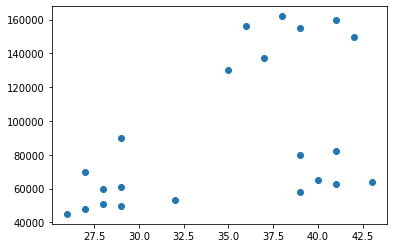

In [5]:
plt.scatter(df.Age, df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)

In [10]:
km.fit_predict(df.drop(['Name'], axis = 'columns'))

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [11]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [12]:
df['Cluster'] = y_predicted

In [13]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


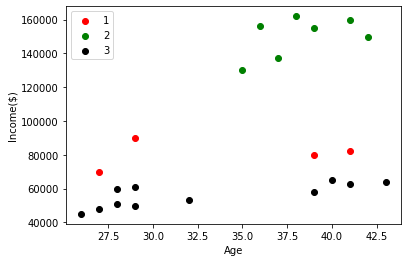

In [15]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'red')
plt.scatter(df2.Age, df2['Income($)'], color = 'green')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([1,2,3])

In [23]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])

In [27]:
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [28]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [30]:
km.fit_predict(df.drop(['Name'], axis = 'columns'))
df.drop(['Cluster'], axis = 'columns')
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [31]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


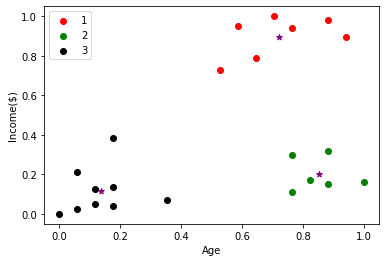

In [35]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color = 'red')
plt.scatter(df2.Age, df2['Income($)'], color = 'green')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '*', color = "purple", label = 'Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend([1,2,3])

In [33]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

In [36]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [37]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.2105547899547249,
 0.18284918484545845,
 0.13781880133764024,
 0.10740235405674733,
 0.08887331913423946]

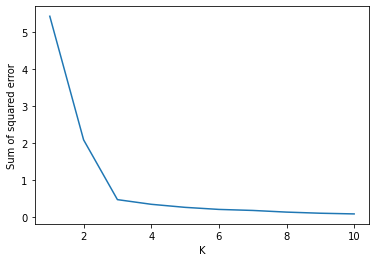

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)